# Training Neural Networks

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [2]:
from res.plot_lib import plot_data, plot_data_np, plot_model, set_default

In [3]:
# Initiale default plotting parameters
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

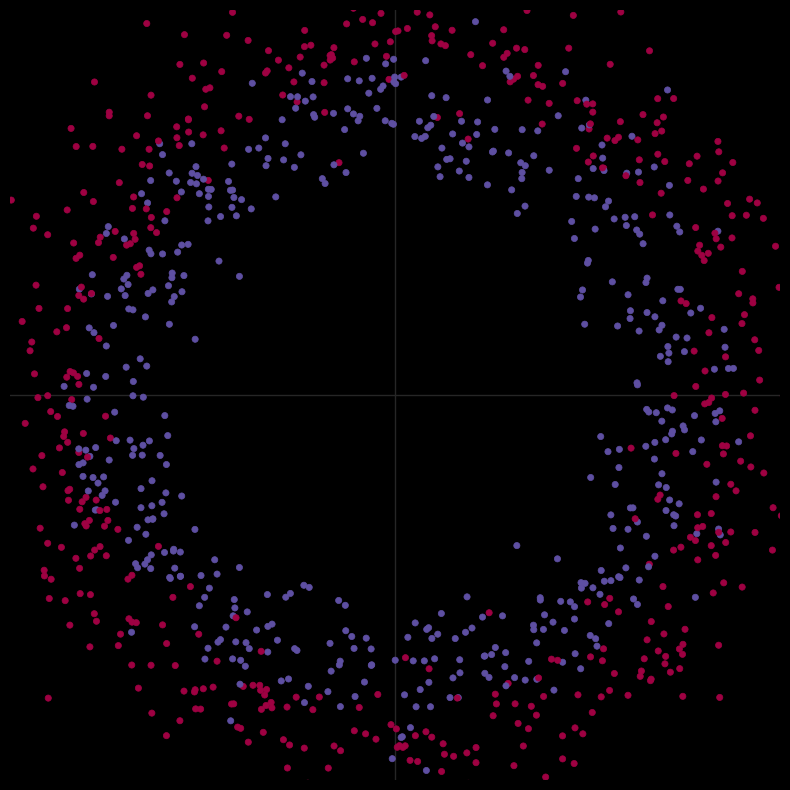

In [6]:
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
plot_data_np(X, y)

### Define a Linear Model

In [7]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [8]:
# from numpy to tensor
X = torch.from_numpy(X).float().to(device)
y = torch.from_numpy(y).type(torch.LongTensor).to(device)

In [21]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 20  # num_hidden_units

In [22]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device) #Convert to CUDA

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2


In [23]:
# Training
def train_model(model, X, y, criterion):
    for t in range(1000):

        # Feed forward to get the logits
        y_pred = model(X)

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        score, predicted = torch.max(y_pred, 1)
        acc = (y == predicted).sum().float() / len(y)
        print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()

In [24]:
train_model(model = model, X = X, y = y, criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.847939, [ACCURACY]: 0.495


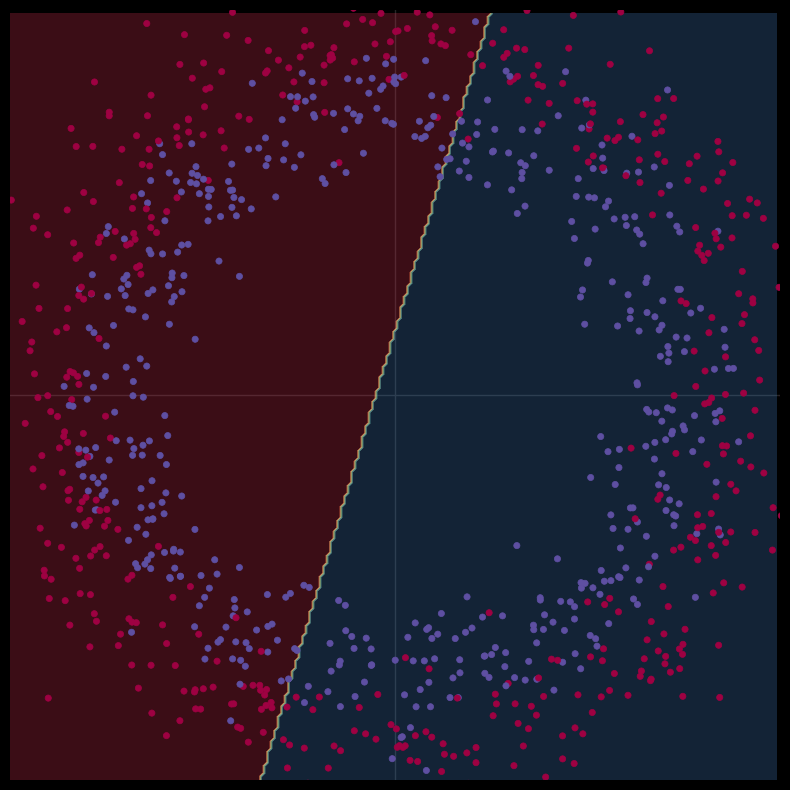

In [25]:
plot_model(X, y, model)

### Add activation function

In [26]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [27]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Tanh(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
train_model(model = model, X = X, y = y, criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.581988, [ACCURACY]: 0.824


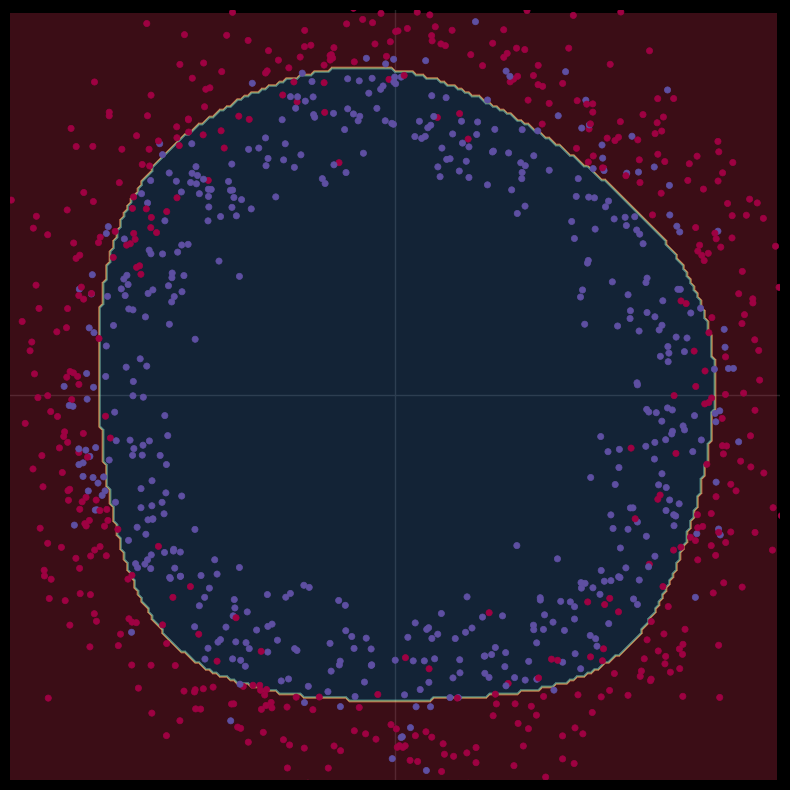

In [28]:
plot_model(X, y, model)

In [29]:
# let's try a deeper model
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Tanh(),
    nn.Linear(H, H),
    nn.Tanh(),
    nn.Linear(H, H),
    nn.Tanh(),
    nn.Linear(H, H),
    nn.Tanh(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
train_model(model = model, X = X, y = y, criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.351419, [ACCURACY]: 0.844


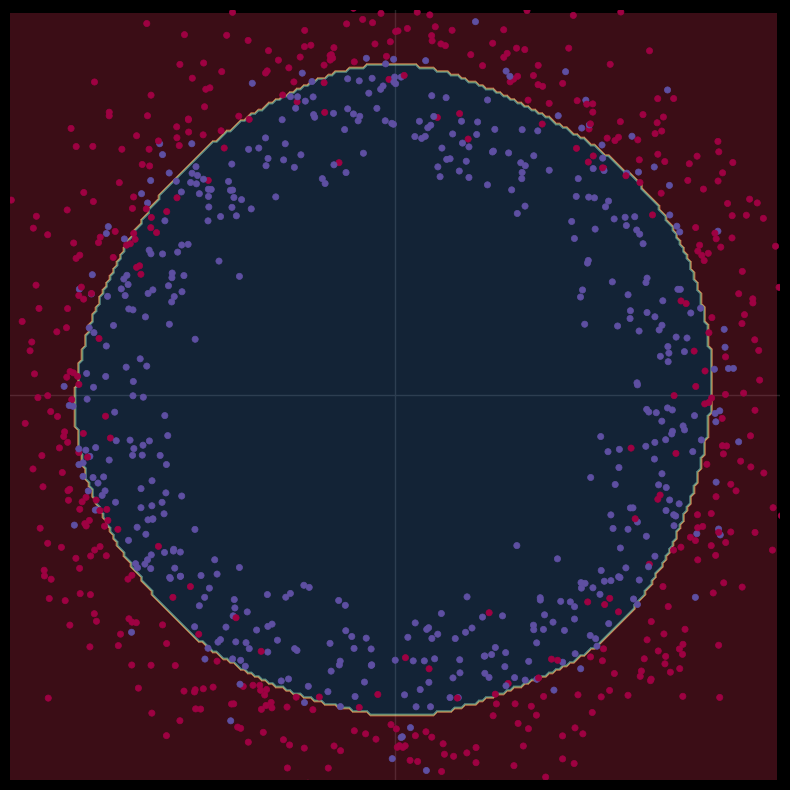

In [30]:
plot_model(X, y, model)

In [31]:
# let's try RelU instead of Tanh
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

# nn package also has different loss functions.
# we use cross entropy loss for our classification task
criterion = torch.nn.CrossEntropyLoss()

# we use the optim package to apply
# ADAM for our parameter updates
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# e = 1.  # plotting purpose

# Training
train_model(model = model, X = X, y = y, criterion = criterion)

[EPOCH]: 999, [LOSS]: 0.345270, [ACCURACY]: 0.848


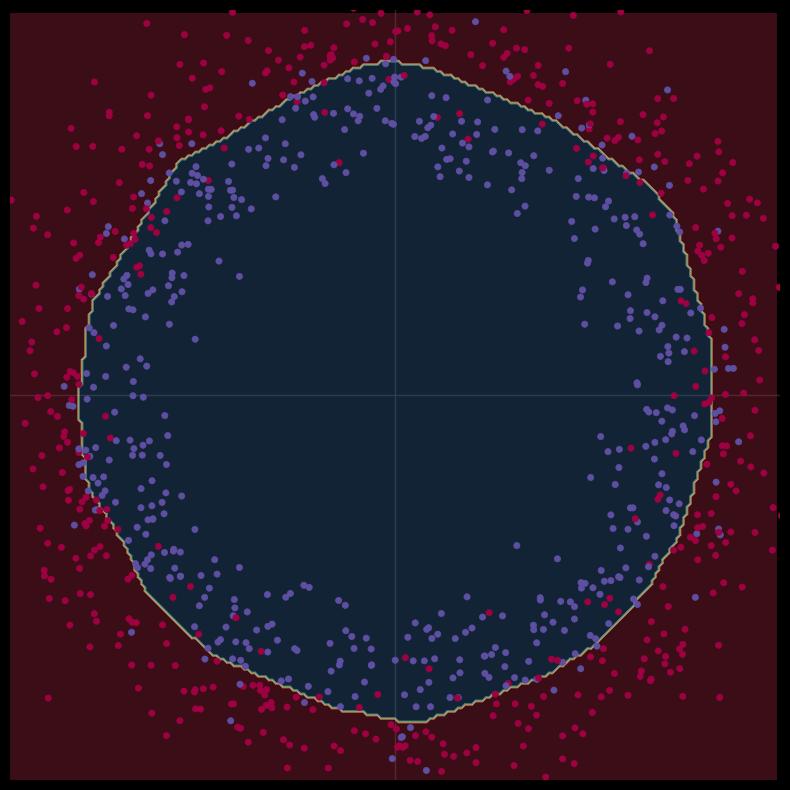

In [32]:
plot_model(X, y, model)